# Introduction to Scikit learn

This notebook demonstrates some of the most useful functions of the beautifiul Scikit-Learn library

0. And end-to-end Scikit learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end and Scikit-Learn workflow

In [5]:
# Get the data ready
import pandas as pd
heart_disease = pd.read_csv('datas/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)
# Create Y 
Y = heart_disease['target'] 

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We keep the default hyperparameters
clf.get_params();

In [11]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

# 80% the datas used by train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
import sklearn
sklearn.show_versions()


System:
    python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\Samuel\Downloads\Programacao\ProjetosMachineLearning\project1\env\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.5.1
          pip: 24.2
   setuptools: 75.1.0
        numpy: 1.26.4
        scipy: 1.14.1
       Cython: None
       pandas: 2.2.2
   matplotlib: 3.9.2
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 4
         prefix: mkl_rt
       filepath: C:\Users\Samuel\Downloads\Programacao\ProjetosMachineLearning\project1\env\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 8
         prefix: vcomp
       filepath: C:\Users\Samuel\Downloads\Programacao\ProjetosMachineLearning\project1\env\vcomp140.dll
        versio

In [15]:
clf.fit(X_train, Y_train);

In [18]:
# make a prediction
import numpy as np

y_label = clf.predict(np.array[0, 2, 3, 4])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [12]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [13]:
# 4. Evaluate the model
clf.score(X_train, Y_train)

1.0

In [15]:
clf.score(X_test, Y_test)

0.819672131147541

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        21
           1       0.85      0.88      0.86        40

    accuracy                           0.82        61
   macro avg       0.80      0.79      0.80        61
weighted avg       0.82      0.82      0.82        61



In [18]:
confusion_matrix(Y_test, y_preds)

array([[15,  6],
       [ 5, 35]], dtype=int64)

In [19]:
accuracy_score(Y_test, y_preds)

0.819672131147541

In [24]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(7)
for i in range(10, 101, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test) * 100:.2f}%")

Trying model with 10 estimators...
Model accuracy on test set: 75.41%
Trying model with 20 estimators...
Model accuracy on test set: 81.97%
Trying model with 30 estimators...
Model accuracy on test set: 78.69%
Trying model with 40 estimators...
Model accuracy on test set: 80.33%
Trying model with 50 estimators...
Model accuracy on test set: 86.89%
Trying model with 60 estimators...
Model accuracy on test set: 77.05%
Trying model with 70 estimators...
Model accuracy on test set: 81.97%
Trying model with 80 estimators...
Model accuracy on test set: 83.61%
Trying model with 90 estimators...
Model accuracy on test set: 81.97%
Trying model with 100 estimators...
Model accuracy on test set: 83.61%


In [25]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [27]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", 'rb'))
loaded_model.score(X_test, Y_test)

0.8360655737704918

## 1) Getting the data ready
Three main things we have to do:
1. Split the data into features and labels (usually `X` & `Y`)
2. Feeling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numeric values (also called feature encoding)

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = heart_disease.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
Y = heart_disease['target']
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
# SPlit the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [26]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [27]:
X.shape

(303, 13)

###  1.1 Make sure it's all numerical

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car_sales = pd.read_csv('datas/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [3]:
len(car_sales)

1000

In [4]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [8]:
car_sales['Doors'].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [6]:
# Split in X and Y
X = car_sales.drop('Price', axis=1)
Y = car_sales['Price']

# split into traning and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

ValueError: could not convert string to float: 'Honda'

In [15]:
# turn the categories in number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_X = transformer.fit_transform(X) 
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [16]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [17]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [18]:
# Refit the model
np.random.seed(7)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [21]:
model.score(X_test, Y_test)

0.3362899219458084

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation)
2. Remove the sample with missing data altogether 

In [22]:
car_sales_missing = pd.read_csv('datas/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [23]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [24]:
X = car_sales_missing.drop('Price', axis=1)
Y = car_sales_missing['Price']

In [25]:
# convert into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_X = transformer.fit_transform(X) 
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

#### Option 1: Fill missing datas with pandas

In [26]:
# Fill missing 'make' column
car_sales_missing['Make'].fillna('missing', inplace=True)
# Fill missing 'Colour' column
car_sales_missing['Colour'].fillna('missing', inplace=True)
# Fill missing 'Odometer' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)
# Fill missing 'Doors' column
car_sales_missing['Doors'].fillna(4, inplace=True)

C:\Users\Samuel\AppData\Local\Temp\ipykernel_7652\1702814935.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing['Make'].fillna('missing', inplace=True)
C:\Users\Samuel\AppData\Local\Temp\ipykernel_7652\1702814935.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [27]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [28]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [29]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [30]:
len(car_sales_missing)

950

In [31]:
X = car_sales_missing.drop('Price', axis=1)
Y = car_sales_missing['Price']

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_X = transformer.fit_transform(X) 
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

#### Option 2: Fill missing values with Scikit-Learn

In [2]:
import pandas as pd
import numpy as np

car_sales_missing = pd.read_csv('datas/car-sales-extended-missing-data.csv')

In [3]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [4]:
# drop the rows with no labels
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [5]:
# Split into X & y
X = car_sales_missing.drop('Price', axis=1)
Y = car_sales_missing['Price']

In [6]:
# Fill missing values with Scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with missing
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# define columns
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [9]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [10]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_filled) 
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [17]:
np.random.seed(7)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(transformed_X,
                                                    Y,
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=50)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.11045663154046326

## 2. Choose the right estimator/algoritm

Some things to note:
* Sklearn refers to machine learning models, algoritms as estimators.
* Classification problem - predicting a category (heart disease or not)
  * Sometimes `clf` (short for classifieir)
* Regression Problem - predicting a number (selling a price of a car)

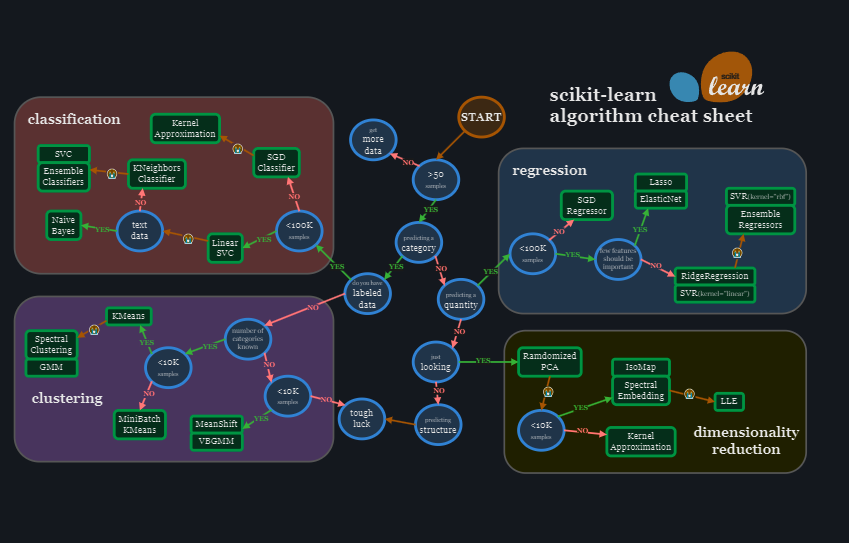

https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine learning model for a regression problem
California house dataset https://scikit-learn.org/1.5/datasets.html

In [3]:
import numpy as np
import pandas as pd

In [6]:
# get california house dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
housing_df['target'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [15]:
housing_df = housing_df.drop('MedHouseVal', axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [16]:
# import algorithm

# setup random seed
np.random.seed(7)

# Create the data
X = housing_df.drop('target', axis=1)
Y = housing_df['target']

# split data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#fit the model
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, Y_train)

# check the precision of model
model.score(X_test, Y_test)

0.6075332508983422

In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)

model.score(X_test, Y_test)

0.7987579613470135

### 2.2 Picking a machine learning model for a classification problem

* If have structured data, used ensemble methods
* If have unstructured data use deep learning or tranfer learning

In [3]:
import pandas as pd 
import numpy as np

heart_disease = pd.read_csv('datas/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
len(heart_disease)

303

In [18]:
# setup the random seed
np.random.seed(16)

# get the datas
X = heart_disease.drop('target', axis=1)
Y = heart_disease['target']

from sklearn.model_selection import train_test_split
# split the datas

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# train the model
from sklearn.svm import LinearSVC

mdl = LinearSVC()
mdl.fit(X_train, Y_train)

# evaluate the model
mdl.score(X_test, Y_test)

0.8032786885245902

In [21]:
# test a other model
from sklearn.ensemble import RandomForestClassifier
np.random.seed(16)

# train the model
mdl = RandomForestClassifier(n_estimators=100)
mdl.fit(X_train, Y_train)

# evaluate the model
mdl.score(X_test, Y_test)

0.7868852459016393

## 3 Fit the model

### 3.1 Fitting the model to the data
* `X` = features, datas
* `Y` = labels, targets

In [25]:
np.random.seed(50)
# get the datas
X = heart_disease.drop('target', axis=1)
Y = heart_disease['target']

# split the datas
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# train the model
from sklearn.ensemble import RandomForestClassifier
mdl = RandomForestClassifier()
mdl.fit(X_train, Y_train)

#evaluate the model
mdl.score(X_test, Y_test)

0.8157894736842105

### 3.2 Make prediction using a machine learnig model

2 ways to making prediction
* `predict()`
* `predict_proba()`

In [28]:
import numpy as np
import pandas as pd

heart_disease = pd.read_csv('datas/heart-disease.csv')
np.random.seed(50)
# get the datas
X = heart_disease.drop('target', axis=1)
Y = heart_disease['target']

# split the datas
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# train the model
from sklearn.ensemble import RandomForestClassifier
mdl = RandomForestClassifier()
mdl.fit(X_train, Y_train)

#evaluate the model
mdl.score(X_test, Y_test)

0.8157894736842105

In [3]:
# use a train model to make predictions
mdl.predict(X_test)

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [4]:
np.array(Y_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [5]:
# compare prediction to truth labels to evaluate the model
Y_preds = mdl.predict(X_test)
np.mean(Y_preds == Y_test)

0.8157894736842105

In [6]:
mdl.score(X_test, Y_test)

0.8157894736842105

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_preds)

0.8157894736842105

Make predictions with `predict_proba()`

In [13]:
mdl.predict_proba(X_test[:5])

array([[0.38, 0.62],
       [0.19, 0.81],
       [0.61, 0.39],
       [0.23, 0.77],
       [0.24, 0.76]])

In [16]:
# Let's predict() on the same data
mdl.predict(X_test[:5])

array([1, 1, 0, 1, 1], dtype=int64)

In [13]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

housing = fetch_california_housing()

In [14]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df['target'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [17]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(7)
# create the data
X = housing_df.drop('target', axis=1)
Y = housing_df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# create a model instance
model = RandomForestRegressor(n_estimators=i)

#fit the model
model.fit(X_train, Y_train)

# make predictions
y_preds = model.predict(X_test)

In [18]:
y_preds[:5]

array([2.45522222, 2.63596667, 3.07151167, 3.63268989, 4.938487  ])

In [20]:
np.array([Y_test[:5]])

array([[3.6    , 3.36   , 2.699  , 2.875  , 5.00001]])

In [22]:
len(y_preds), len(Y_test)

(4128, 4128)

In [25]:
# compare the preditcion on the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, Y_test)

0.33967754683462553

## 4 Evaluating a machine learning model

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

In [33]:
from sklearn.ensemble import RandomForestClassifier

# get the datas
np.random.seed(7)
X = heart_disease.drop('target', axis=1)
Y = heart_disease['target']

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#train the model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [34]:
model.score(X_test, Y_test)

0.7213114754098361

### 4.2 Evaluating a model with `scoring` paramater
avoid a luck score!

In [38]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# get the datas
np.random.seed(9)
X = heart_disease.drop('target', axis=1)
Y = heart_disease['target']

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#train the model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [39]:
cross_val_score(model, X, Y)

array([0.85245902, 0.90163934, 0.83606557, 0.81666667, 0.76666667])

In [41]:
np.random.seed(9)

mdl_single_score = model.score(X_test, Y_test)
# take  the mean of 5-fold
mdl_cross_val_score = np.mean(cross_val_score(model, X, Y))

mdl_single_score, mdl_cross_val_score

(0.8032786885245902, 0.821584699453552)

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [3]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# get the datas
np.random.seed(9)
heart_disease = pd.read_csv("datas/heart-disease.csv")
X = heart_disease.drop('target', axis=1)
Y = heart_disease['target']

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#train the model
model = RandomForestClassifier()
model.fit(X_train, Y_train)
cros_val_score = cross_val_score(model, X, Y)

In [53]:
print(f"Heart disease classifier accuracy: {np.mean(cros_val_score) * 100:.2f} %")

Heart disease classifier accuracy: 83.47 %


**Area under the receiver operating charactereistc curv(AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positve rate (tpr) vs a models false positve rate (fpr)
* True positive = model's predict 1 when truth is 1
* False positive = model's predict 1 when truth is 0
* True negative = model's predict 0 when truth is 0
* False negative = model's predict 0 when truth is 1

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.metrics import roc_curve

model.fit(X_train, Y_train)
# make a prediction with probabilets
y_probs = model.predict_proba(X_test)

y_probs_positive = y_probs[:, 1]

In [55]:
fpr, tpr, thresholds = roc_curve(Y_test, y_probs_positive)

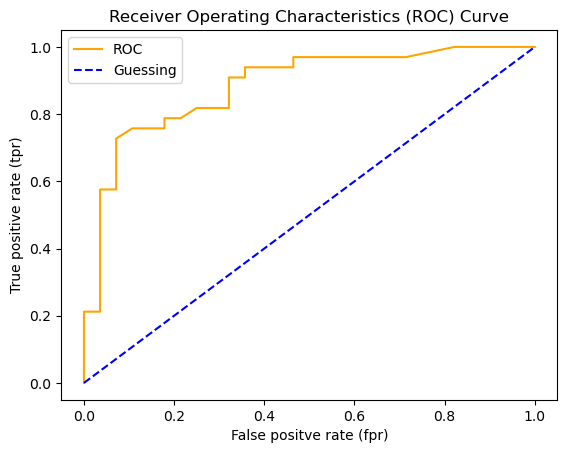

In [57]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots as ROC curve given the false rate (fpr)
    and true positive rate (tpr) of a model
    """
    # plot the roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line  with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Guessing')

    # customize plot
    plt.xlabel("False positve rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title('Receiver Operating Characteristics (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [59]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, y_probs_positive)

0.8836580086580086

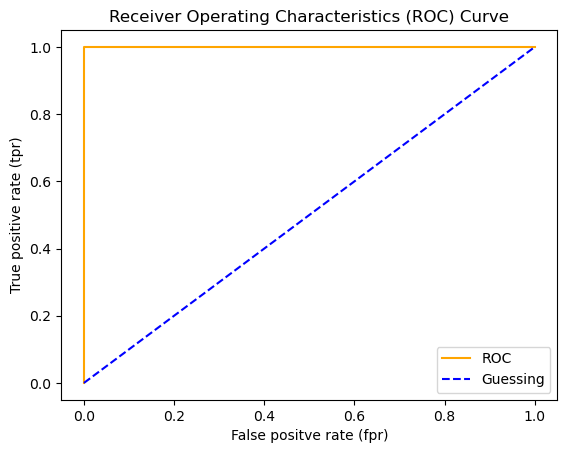

In [60]:
# a perfect ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_test)
plot_roc_curve(fpr, tpr)

**Confusion matrix**

Is a quick way to compore the labels a model predicts and the actual labels it was supposed to predict

In essence, giving you an idea of where the model is getting confused.
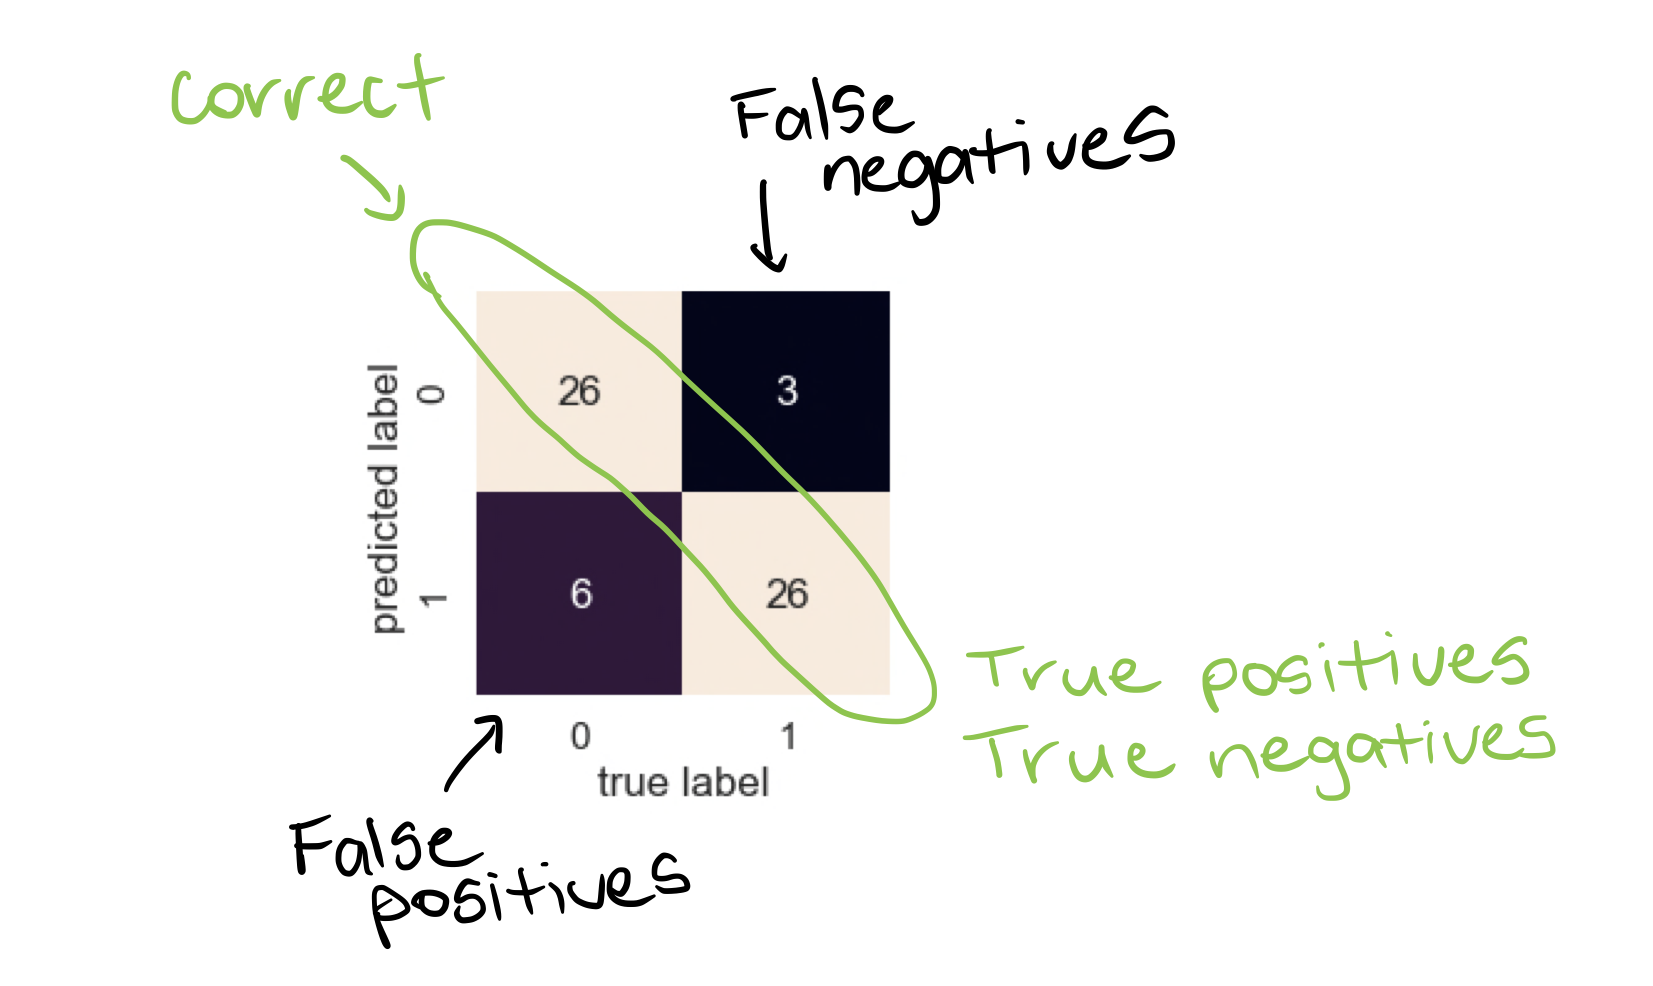!

In [5]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(Y_test, y_preds)

array([[18, 10],
       [ 3, 30]], dtype=int64)

In [64]:
# visualite confusion matrix with pd cross table
pd.crosstab(Y_test, 
            y_preds,
            rownames=['Actual Label'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,18,10
1,3,30


In [65]:
# make our confusion matrix more visible with seaborn.heatmap
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(Y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat)

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# install a packet
import sys
!conda install --yes --prefix {sys.prefix} seaborn

<Axes: >

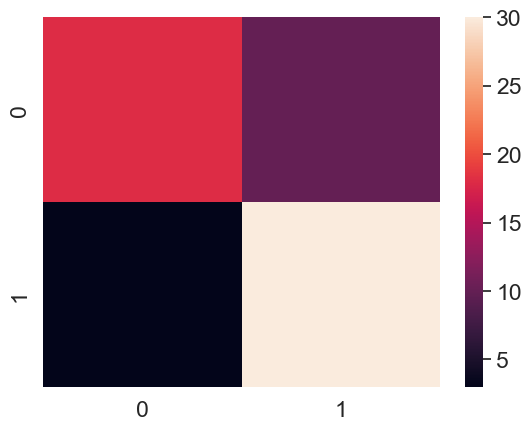

In [66]:
# make our confusion matrix more visible with seaborn.heatmap
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(Y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat)

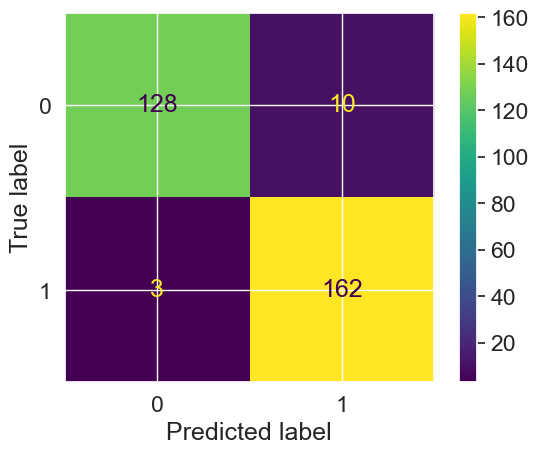

In [68]:
#confusion matrix with sklearn
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=Y);

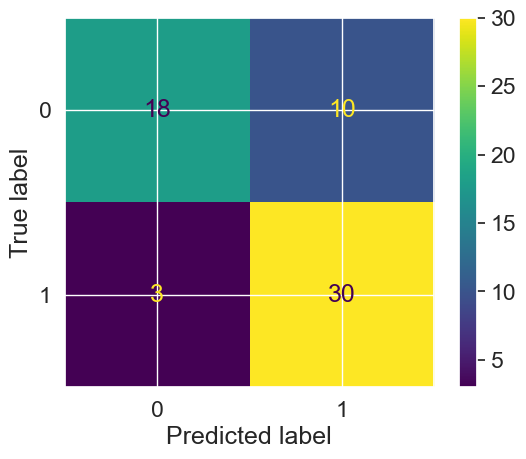

In [72]:
ConfusionMatrixDisplay.from_predictions(y_true=Y_test,
                                       y_pred=y_preds);

**Classification report**

https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

In [7]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



In [11]:
# where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds,
                                   output_dict=True))

C:\Users\Samuel\Downloads\Programacao\ProjetosMachineLearning\project1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Samuel\Downloads\Programacao\ProjetosMachineLearning\project1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Samuel\Downloads\Programacao\ProjetosMachineLearning\project1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/1.5/modules/model_evaluation.html

1. **R^2 (r-squared) or coefficent of determination**

    Compares your models predictions to the mean of the targets. Values can range from negative infinity to 1. For example, if all your models does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1 
2. **Mean absolute error (MAE)**
   
    MAE is the average of the absolute differences between predictions and actual values
3. **Mean squared error (MSE)**

    MSE is the mean of the square of the errors between actual and predicted values

In [15]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(8)
X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
model.score(X_test, y_test)

0.8065734772187598

In [17]:
y_test.mean()

2.0550030959302323

In [18]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [19]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [20]:
r2_score(y_test, y_test_mean)

0.0

In [22]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

In [24]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [26]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})

df['differences'] = df['predicted values'] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [30]:
df['differences'].mean()

0.012048392126937589

In [28]:
np.abs(df['differences']).mean()

0.32659871732073664

In [32]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [36]:
df['squared differences'] = np.square(df['differences'])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


### 4.2.3 Using the `scoring` paramater

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(7)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

model = RandomForestClassifier()

In [42]:
np.random.seed(7)

# cros validation accuracy
cv_acc = cross_val_score(model, X, y, scoring=None)
cv_acc

array([0.7704918 , 0.8852459 , 0.78688525, 0.83333333, 0.75      ])

In [43]:
# cross validated accuracy
print(f"The cross validated accuracy is {np.mean(cv_acc) * 100:.2f} %")

The cross validated accuracy is 80.52 %


In [47]:
np.random.seed(7)

# crosvalidation accuracy
cv_acc = cross_val_score(model, X, y, scoring='accuracy')
cv_acc

array([0.7704918 , 0.8852459 , 0.78688525, 0.83333333, 0.75      ])

In [45]:
# cross validated accuracy
print(f"The cross validated accuracy is {np.mean(cv_acc) * 100:.2f} %")

The cross validated accuracy is 80.52 %


In [51]:
# Precison
np.random.seed(7)

# cros validation precision
cv_precision = cross_val_score(model, X, y, scoring='precision')
cv_precision

array([0.77142857, 0.90625   , 0.83333333, 0.87096774, 0.73684211])

In [56]:
# cross validated accuracy
print(f"The cross validated precision is {np.mean(cv_precision) * 100:.2f} %")

The cross validated precision is 82.38 %


In [53]:
# Recall
np.random.seed(7)

# cros validation precision
cv_recall = cross_val_score(model, X, y, scoring='recall')
cv_recall

array([0.81818182, 0.87878788, 0.75757576, 0.81818182, 0.84848485])

In [55]:
# cross validated accuracy
print(f"The cross validated recall is {np.mean(cv_recall) * 100:.2f} %")

The cross validated recall is 82.42 %


`scoring` parameter being using for a regression problem https://scikit-learn.org/1.5/modules/model_evaluation.html

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(7)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

model = RandomForestRegressor()

In [67]:
np.random.seed(7)
cv_r2 = cross_val_score(model, X, y, scoring=None)
np.mean(cv_r2)

0.6498868866479368

In [68]:
cv_r2

array([0.50709337, 0.70058736, 0.73860974, 0.62079671, 0.68234726])

In [70]:
# mean squared error
np.random.seed(7)
cv_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-0.43275219972302

In [73]:
cv_mse

array([-0.52951592, -0.3504814 , -0.37601789, -0.44487538, -0.46287041])

In [71]:
# mean absolute error
np.random.seed(7)
cv_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.46768285841085283

In [72]:
cv_mae

array([-0.5471398 , -0.41150644, -0.44054169, -0.46710641, -0.47211994])

### 4.3 Using different evaluate metrics as Scikt learning functions

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(17)

# create x & y
X = heart_disease.drop('target', axis=1) 
y = heart_disease['target']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create a mode
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_preds = model.predict(X_test)

# evaluate the model
print("Classifier metrics on the test set:")
print(f"Accuracy score: {accuracy_score(y_test, y_preds) * 100 :.2f}")
print(f"Precision score: {precision_score(y_test, y_preds) * 100 :.2f}")
print(f"Recall score: {recall_score(y_test, y_preds) * 100 :.2f}")
print(f"F1 score: {f1_score(y_test, y_preds) * 100 :.2f}")

Classifier metrics on the test set:
Accuracy score: 80.33
Precision score: 74.19
Recall score: 85.19
F1 score: 79.31


In [84]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(17)

# create x & y
X = heart_disease.drop('target', axis=1) 
y = heart_disease['target']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create a mode
model = RandomForestRegressor()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_preds = model.predict(X_test)

# evaluate the model
print("Classifier metrics on the test set:")
print(f"R^2 score: {r2_score(y_test, y_preds)}")
print(f"MAE score: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE score: {mean_squared_error(y_test, y_preds)}")

Classifier metrics on the test set:
R^2 score: 0.44987037037037025
MAE score: 0.2527868852459016
MSE score: 0.13572131147540986


## 5. Improving a model

First prediction = baseline predictions

First model = baseline model

From a data perspective:
* Could we collect more data?
* Could we improve our data?

From a model perspective:
* Is the best model we can use?
* Could we improve the current model?

*Parameters = model find these patterns in data*

*Hyperparameter = settings on a model you can adjust to improve this ability to find the patterns*

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [1]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [2]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tunning hyperparamets by hand

try adjust the 
* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimators`

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparioson on y_true labels vs y_preds labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {'accuracy': round(accuracy, 2),
                   'precision': round(precision, 2),
                   'recall': round(recall, 2),
                   'f1': round(f1, 2),}
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")

    return metric_dict

In [6]:
import pandas as pd
import numpy as np

heart_disease = pd.read_csv("datas/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [63]:
from sklearn.ensemble import RandomForestClassifier

# Set a seed
np.random.seed(7)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X, Y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split the data into train validation & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# make baseline predictions
y_preds = model.predict(X_test)

# evaluate the classifier
baseline_metrics = evaluate_preds(y_test, y_preds)

Accuracy: 77.63%
Precision: 0.74
Recall: 0.87
F1: 0.80


In [26]:
np.random.seed(7)

# create a second  classifier with different hyperparameters
model_2 = RandomForestClassifier(n_estimators=100)
model_2.fit(X_train, y_train)

# Make prediction what different hyperparameters
y_preds_2 = model_2.predict(X_valid)

# evaluate the 2nd classifier
model_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 77.78%
Precision: 0.88
Recall: 0.76
F1: 0.81


### 5.2 Hyperparamets tuning with RandomizedSearchCV

In [43]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['log2', 'sqrt', None],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

np.random.seed(7)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X, Y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y)

# init the model
# n_jobs how much CPU in this model
model = RandomForestClassifier(n_jobs=1)

# sertup randomized search cv
rs_model = RandomizedSearchCV(estimator=model,
                             param_distributions=grid,
                             n_iter=10, # number of models to try
                             cv=5,
                             verbose=2)

# fit the randomizedsearchcv version of a clf
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   2.5s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [45]:
rs_model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [47]:
# make predictions with the best params
np.random.seed(7)

rs_y_preds = rs_model.predict(X_test)
# evaluate the predicitions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 77.63%
Precision: 0.74
Recall: 0.87
F1: 0.80


### 5.3 Hyperparamaters tuning with GridSearchCV

In [49]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['log2', 'sqrt', None],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [52]:
grid_2 = {'n_estimators': [100, 200, 500],
        'max_depth': [30],
        'max_features': ['log2', 'sqrt', None],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]} 
grid_2

{'n_estimators': [100, 200, 500],
 'max_depth': [30],
 'max_features': ['log2', 'sqrt', None],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]}

In [54]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(7)

# inst the model
model = RandomForestClassifier(n_jobs=1)

# setup grid search CV
gs_model = GridSearchCV(estimator=model,
                       param_grid=grid_2,
                       cv=5,
                       verbose=2)

gs_model.fit(X_train, y_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200

In [55]:
gs_model.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [59]:
# make predictions with the best params
np.random.seed(7)

gs_y_preds = gs_model.predict(X_test)
# evaluate the predicitions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 78.95%
Precision: 0.76
Recall: 0.87
F1: 0.81


Comparing the different models metrics

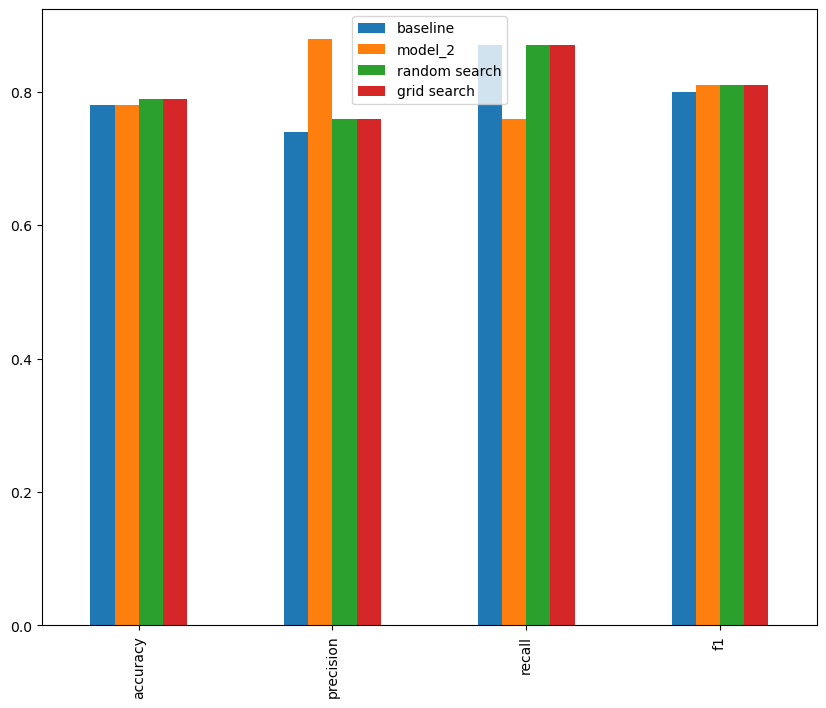

In [64]:
compare_metrics = pd.DataFrame({'baseline':baseline_metrics,
                               'model_2': model_2_metrics,
                                'random search': rs_metrics,
                                'grid search': gs_metrics} 
                              )

compare_metrics.plot.bar(figsize=(10,8));

## 6. Save and load a model

Two ways to save and load a model
1. With python's `pickle` module
2. With the `joblib` module

**Pickle**

In [67]:
import pickle

# save an existing model to file
pickle.dump(gs_model, open('models/gs_random_forest_model_1.pkl', 'wb'))

In [70]:
# load a save model
loaded_pickle_model = pickle.load(open('models/gs_random_forest_model_1.pkl', 'rb'))

In [72]:
loaded_pickle_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [30],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [74]:
# make some predicts
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 78.95%
Precision: 0.76
Recall: 0.87
F1: 0.81


{'accuracy': 0.79, 'precision': 0.76, 'recall': 0.87, 'f1': 0.81}

**Joblib**

if has much datas is best use joblib

In [75]:
from joblib import dump, load

dump(rs_model, filename="models/rs_random_forest_model_1.joblib") 

['models/rs_random_forest_model_1.joblib']

In [78]:
# import a save joblib model 
loaded_joblib_model = load(filename="models/rs_random_forest_model_1.joblib")

In [79]:
# make evaluations predicts
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 77.63%
Precision: 0.74
Recall: 0.87
F1: 0.80


{'accuracy': 0.78, 'precision': 0.74, 'recall': 0.87, 'f1': 0.8}

## 7. Putting it all togheter

In [3]:
car_sales = pd.read_csv('datas/car-sales-extended.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [6]:
# check if has none values
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [7]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# setup a seed
import numpy as np
np.random.seed(7)

# read the datas
car_sales = pd.read_csv('datas/car-sales-extended-missing-data.csv')
car_sales.dropna(subset='Price', inplace=True)

# fill missing values
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_features = ['Doors']
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value=4))
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean'))
])

# convert the string in numbers
preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features),
            ('door', door_transformer, door_features),
            ('num', numeric_transformer, numeric_features)
        ])

# creating a pre processor and modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model', Ridge())])

# get the datas
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# split the datas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train the model
model.fit(X_train, y_train)

# evaluate the model
model.score(X_test, y_test)

0.29015128987308025

In [66]:
# using `GridSearchCV` or `RandomizedSearchCV`

pipe_grid = {
    "preprocessor__num__imputer__strategy": ['mean', 'median'],
    "model__alpha": [5, 8, 10],
}

gs_model = GridSearchCV(
    estimator=model,
    param_grid=pipe_grid,
    cv=5,  
    verbose=2
)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END model__alpha=5, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__alpha=5, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__alpha=5, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__alpha=5, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__alpha=5, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__alpha=5, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__alpha=5, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__alpha=5, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__alpha=5, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__alpha=5, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__alpha=8, preprocessor__num__imputer__strateg

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [5, 8, 10],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [67]:
gs_model.best_params_

{'model__alpha': 8, 'preprocessor__num__imputer__strategy': 'mean'}

In [68]:
gs_model.score(X_test, y_test)

0.29452775676543974

**Saving the model**

In [70]:
import pickle

# save an existing model to file
pickle.dump(gs_model, open('models/gs_ridge_1.pkl', 'wb'))

To reading more later - https://scikit-learn.org/stable/